<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 120.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 135.6 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




Data cleaned: 'Age_Numeric' and 'YearsCodePro_Numeric' columns created.


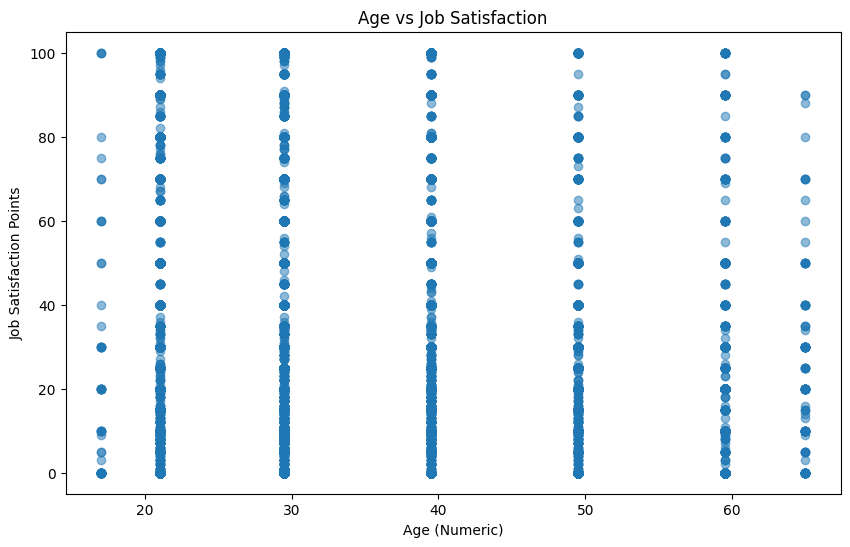

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# 1. Clean Age Column
def parse_age(age_str):
    if pd.isna(age_str) or 'Prefer' in str(age_str):
        return None
    if '18-24' in age_str: return 21
    if '25-34' in age_str: return 29.5
    if '35-44' in age_str: return 39.5
    if '45-54' in age_str: return 49.5
    if '55-64' in age_str: return 59.5
    if '65' in age_str: return 65
    if 'Under 18' in age_str: return 17
    return None

df['Age_Numeric'] = df['Age'].apply(parse_age)

# 2. Clean YearsCodePro Column
def parse_years(years_str):
    if pd.isna(years_str):
        return None
    if 'Less than 1 year' in str(years_str):
        return 0.5
    if 'More than 50 years' in str(years_str):
        return 51
    try:
        return float(years_str)
    except ValueError:
        return None

df['YearsCodePro_Numeric'] = df['YearsCodePro'].apply(parse_years)

print("Data cleaned: 'Age_Numeric' and 'YearsCodePro_Numeric' columns created.")

plt.figure(figsize=(10, 6))
# Use the new numeric age column
plt.scatter(df['Age_Numeric'], df['JobSatPoints_6'], alpha=0.5)
plt.title('Age vs Job Satisfaction')
plt.xlabel('Age (Numeric)')
plt.ylabel('Job Satisfaction Points')
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


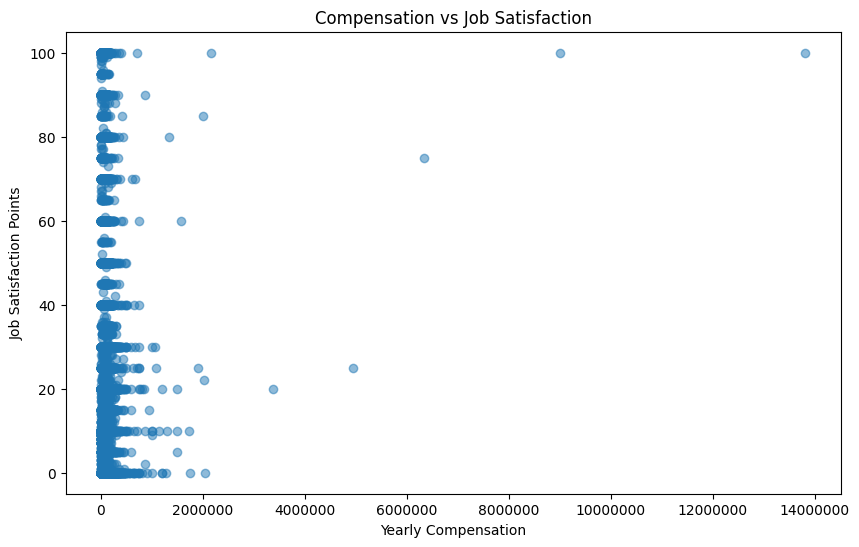

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], alpha=0.5)
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Points')
plt.ticklabel_format(style='plain', axis='x') # Prevent scientific notation
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


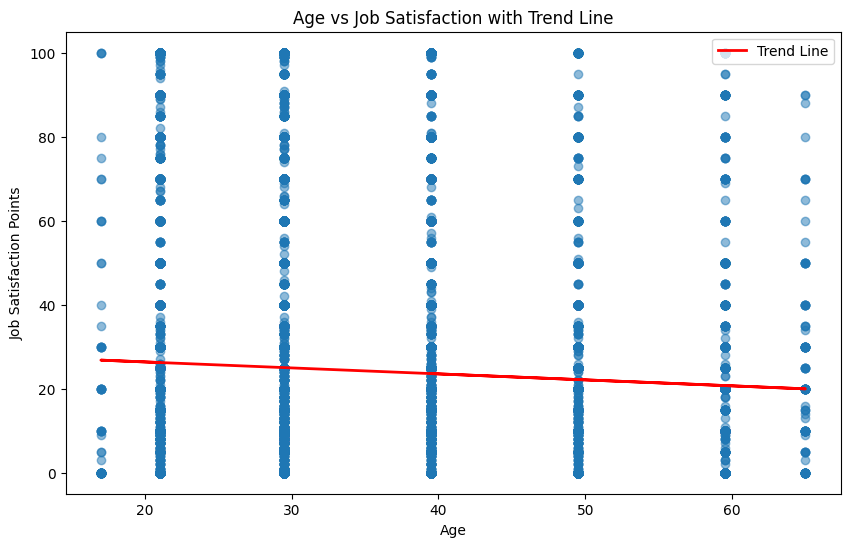

In [17]:
df_trend = df.dropna(subset=['Age_Numeric', 'JobSatPoints_6'])

x = df_trend['Age_Numeric']
y = df_trend['JobSatPoints_6']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.plot(x, p(x), color='red', linewidth=2, label='Trend Line')
plt.title('Age vs Job Satisfaction with Trend Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Points')
plt.legend()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


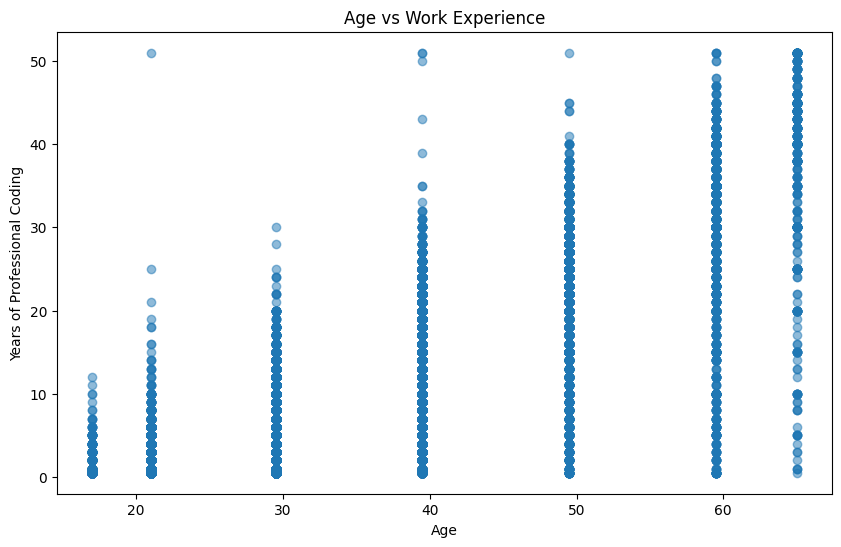

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age_Numeric'], df['YearsCodePro_Numeric'], alpha=0.5)
plt.title('Age vs Work Experience')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding')
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


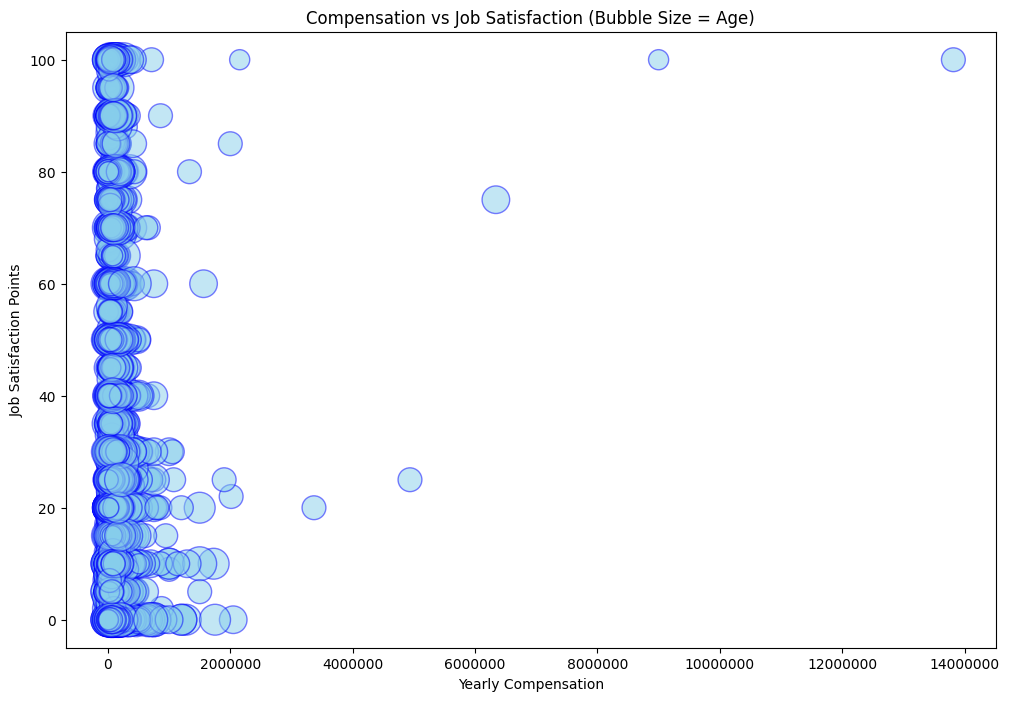

In [19]:
df_bubble = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_Numeric'])

plt.figure(figsize=(12, 8))
plt.scatter(
    df_bubble['ConvertedCompYearly'], 
    df_bubble['JobSatPoints_6'], 
    s=df_bubble['Age_Numeric'] * 10,
    alpha=0.5,
    c='skyblue', 
    edgecolors='b'
)
plt.title('Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Points')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


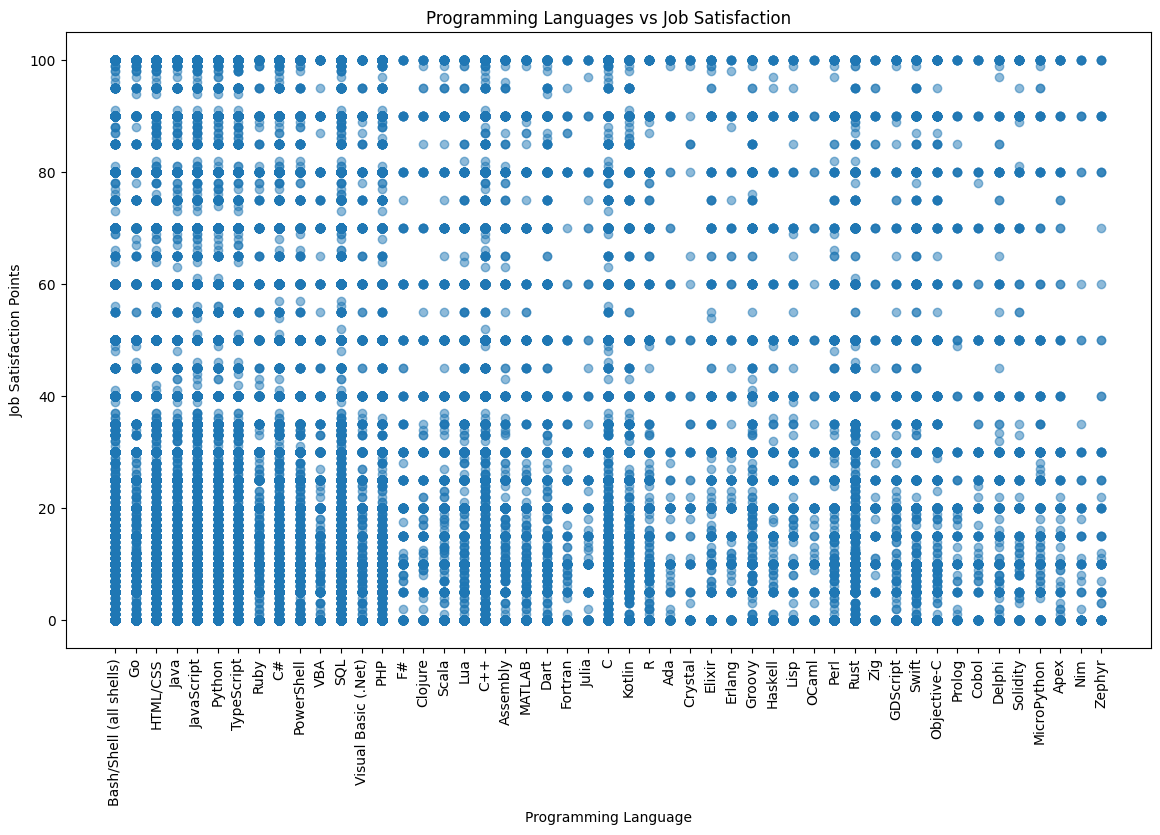

In [20]:
df_lang = df.assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
df_lang = df_lang.dropna(subset=['Language', 'JobSatPoints_6'])
plt.figure(figsize=(14, 8))
plt.scatter(df_lang['Language'], df_lang['JobSatPoints_6'], alpha=0.5)
plt.title('Programming Languages vs Job Satisfaction')
plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction Points')
plt.xticks(rotation=90)
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


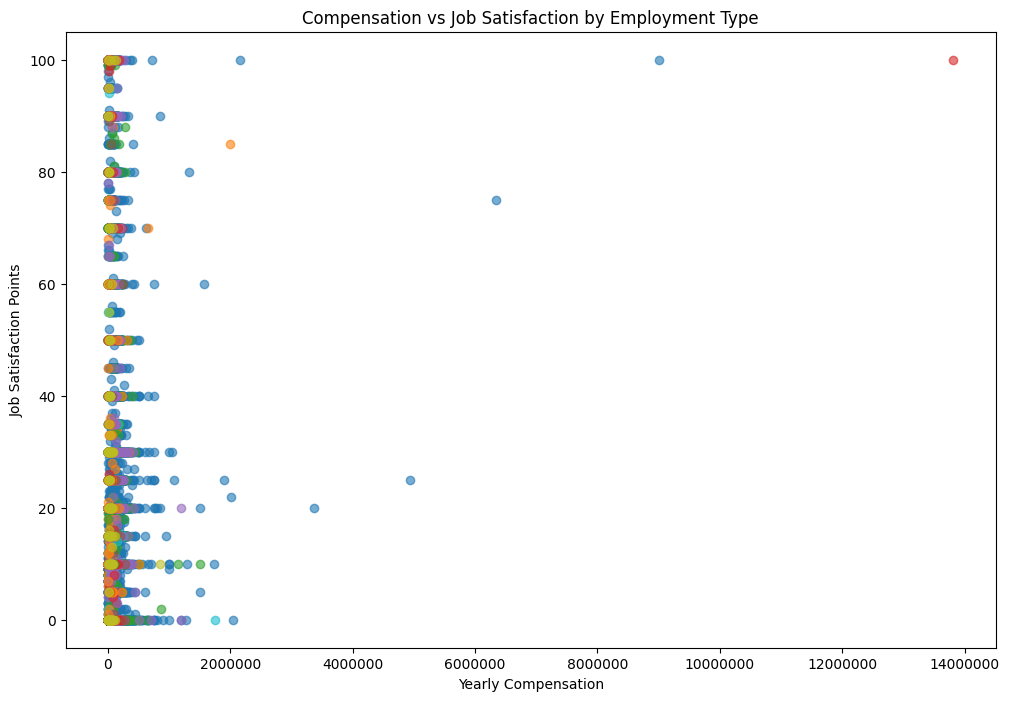

In [22]:
plt.figure(figsize=(12, 8))
groups = df.groupby('Employment')
for name, group in groups:
    plt.scatter(group['ConvertedCompYearly'], group['JobSatPoints_6'], label=name, alpha=0.6)

plt.title('Compensation vs Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Points')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


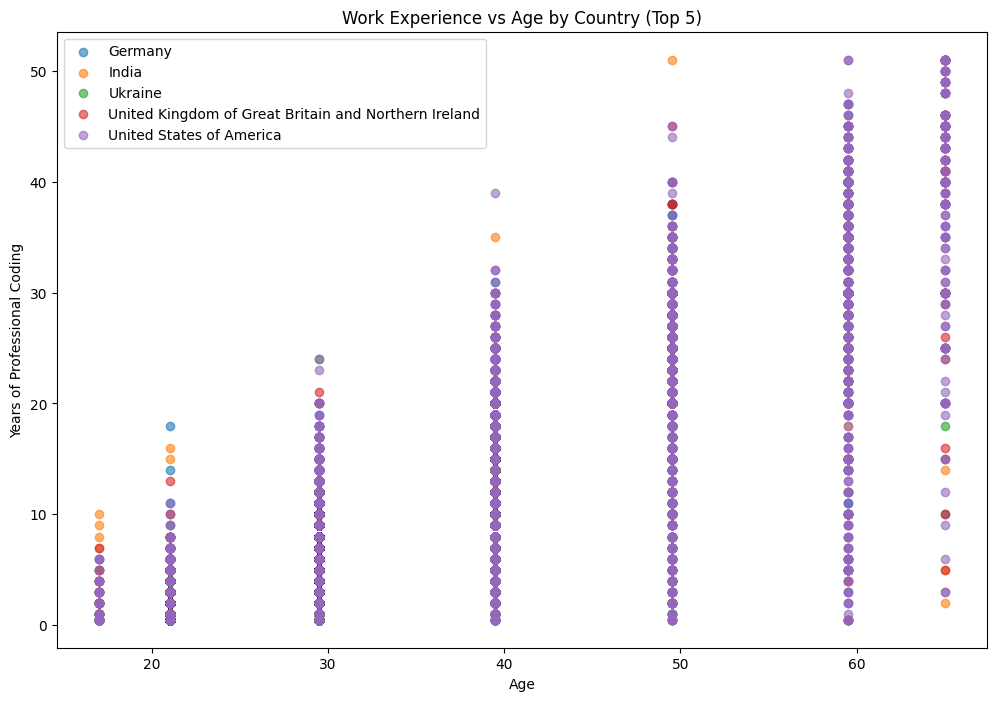

In [23]:
top_countries = df['Country'].value_counts().nlargest(5).index
df_filtered = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(12, 8))

# Plot each country
groups = df_filtered.groupby('Country')
for name, group in groups:
    plt.scatter(
        group['Age_Numeric'], 
        group['YearsCodePro_Numeric'], 
        label=name, 
        alpha=0.6
    )

plt.title('Work Experience vs Age by Country (Top 5)')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding')
plt.legend()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
